<a href="https://colab.research.google.com/github/CerberDev/DesafioOne/blob/main/TelecomX_BR_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Remoção de Colunas Irrelevantes


In [1]:
import pandas as pd

# 1. Carregar o arquivo CSV com os dados já tratados
try:
    # O nome do arquivo que salvamos no passo anterior
    nome_arquivo = 'telecom_churn_tratado.csv'
    df_modelo = pd.read_csv(nome_arquivo)

    print(f"✅ Arquivo '{nome_arquivo}' carregado com sucesso!")
    print(f"Dimensões iniciais do DataFrame: {df_modelo.shape}")
    print("\nColunas carregadas:")
    print(df_modelo.columns.tolist())

except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_arquivo}' não foi encontrado.")
    print("Por favor, certifique-se de que o arquivo está no mesmo diretório que o seu notebook.")
    # Interrompe a execução se o arquivo não for encontrado
    exit()

# 2. Eliminar a coluna de identificação
# Verificamos se a coluna existe antes de tentar removê-la
if 'ID_Cliente' in df_modelo.columns:
    # Usamos o método .drop() para remover a coluna
    # axis=1 indica que estamos removendo uma coluna (axis=0 seria uma linha)
    # inplace=True modifica o DataFrame diretamente, sem precisar de reatribuição (df = df.drop(...))
    df_modelo.drop('ID_Cliente', axis=1, inplace=True)

    print("\n✅ Coluna 'ID_Cliente' removida com sucesso!")
    print(f"Dimensões finais do DataFrame: {df_modelo.shape}")

else:
    print("\nA coluna 'ID_Cliente' não foi encontrada no DataFrame. Nenhuma ação foi necessária.")


# 3. Verificar o resultado final
print("\n--- 5 primeiras linhas do DataFrame pronto para modelagem ---")
print(df_modelo.head())

✅ Arquivo 'telecom_churn_tratado.csv' carregado com sucesso!
Dimensões iniciais do DataFrame: (7032, 23)

Colunas carregadas:
['ID_Cliente', 'Evasao', 'Genero', 'Idoso', 'Possui_Parceiro', 'Possui_Dependentes', 'Meses_Contrato', 'Servico_Telefonico', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Metodo_Pagamento', 'Fatura_Mensal', 'Fatura_Total', 'Fatura_Diaria', 'Qtd_Servicos_Adicionais']

✅ Coluna 'ID_Cliente' removida com sucesso!
Dimensões finais do DataFrame: (7032, 22)

--- 5 primeiras linhas do DataFrame pronto para modelagem ---
   Evasao  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  Meses_Contrato  \
0       0       0      0                1                   1               9   
1       0       1      0                0                   0               9   
2       1       1      0                0                   0       

#Encoding

In [2]:
print("--- Iniciando a transformação de variáveis categóricas ---")
print(f"Dimensões do DataFrame antes do One-Hot Encoding: {df_modelo.shape}")

# 1. Identificar as colunas que ainda são do tipo 'object' (texto)
colunas_categoricas = df_modelo.select_dtypes(include=['object']).columns

print("\nColunas que serão transformadas:")
print(colunas_categoricas.tolist())

# 2. Aplicar o One-Hot Encoding
# A função get_dummies() faz todo o trabalho pesado para nós.
# O parâmetro 'drop_first=True' é uma boa prática em modelagem para evitar
# multicolinearidade, removendo a primeira categoria de cada nova variável.
df_final = pd.get_dummies(df_modelo, columns=colunas_categoricas, drop_first=True)


# 3. Verificar o resultado final
print(f"\n✅ One-Hot Encoding aplicado com sucesso!")
print(f"Dimensões do DataFrame final: {df_final.shape}")

print("\n--- Verificando os tipos de dados do DataFrame final ---")
# Usamos .info() para confirmar que todas as colunas são numéricas
df_final.info()

print("\n--- 5 primeiras linhas do DataFrame 100% numérico ---")
# Observe as novas colunas criadas no final do DataFrame
print(df_final.head())

--- Iniciando a transformação de variáveis categóricas ---
Dimensões do DataFrame antes do One-Hot Encoding: (7032, 22)

Colunas que serão transformadas:
['Multiplas_Linhas', 'Servico_Internet', 'Tipo_Contrato', 'Metodo_Pagamento']

✅ One-Hot Encoding aplicado com sucesso!
Dimensões do DataFrame final: (7032, 26)

--- Verificando os tipos de dados do DataFrame final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Evasao                                    7032 non-null   int64  
 1   Genero                                    7032 non-null   int64  
 2   Idoso                                     7032 non-null   int64  
 3   Possui_Parceiro                           7032 non-null   int64  
 4   Possui_Dependentes                        7032 non-null   int64  
 5   Meses_Contrato    

#Verificação da Proporção de Evasão

--- Análise de Balanceamento da Variável Alvo (Evasao) ---

Contagem de Clientes por Classe:
Evasao
0    5163
1    1869
Name: count, dtype: int64

Proporção de Clientes por Classe (%):
Evasao
Não Evadiram    73.42
Evadiram        26.58
Name: proportion, dtype: float64


/tmp/ipython-input-117327342.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Evadiram (0)', 'Evadiram (1)'])


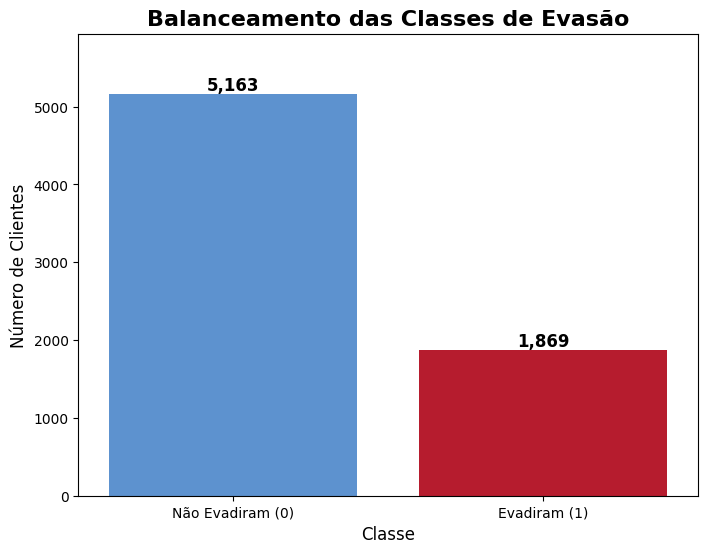

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


print("--- Análise de Balanceamento da Variável Alvo (Evasao) ---")

# 1. Calcular a contagem de cada classe
contagem_classes = df_final['Evasao'].value_counts()
print("\nContagem de Clientes por Classe:")
print(contagem_classes)

# 2. Calcular a proporção de cada classe
proporcao_classes = df_final['Evasao'].value_counts(normalize=True) * 100
print("\nProporção de Clientes por Classe (%):")
# Mapeando 0 para 'Não Evadiram' e 1 para 'Evadiram' para clareza
proporcao_classes.index = proporcao_classes.index.map({0: 'Não Evadiram', 1: 'Evadiram'})
print(proporcao_classes.round(2))

# 3. Visualizar o desbalanceamento
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Evasao', data=df_final, palette=['#4A90E2', '#D0021B'], hue='Evasao', legend=False)

# Adicionar anotações de texto (os números exatos) em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}'.format, fontsize=12, fontweight='bold')

# Configurações do gráfico
plt.title('Balanceamento das Classes de Evasão', fontsize=16, fontweight='bold')
ax.set_xticklabels(['Não Evadiram (0)', 'Evadiram (1)'])
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
ax.set_ylim(0, contagem_classes.max() * 1.15) # Espaço para o texto
plt.show()

#Balanceamento de Classes (opcional )

In [5]:
pip install imbalanced-learn

--- Iniciando o processo de Balanceamento de Dados ---
Formato das Features (X): (7032, 25)
Formato do Alvo (y): (7032,)

--- Distribuição das classes ANTES do balanceamento ---
No conjunto de treino:
Evasao
0    0.73
1    0.27
Name: proportion, dtype: float64

No conjunto de teste:
Evasao
0    0.73
1    0.27
Name: proportion, dtype: float64


--- Aplicando SMOTE para balancear o conjunto de treino ---
Balanceamento concluído!

--- Distribuição das classes DEPOIS do balanceamento (no conjunto de treino) ---
Evasao
1    0.5
0    0.5
Name: proportion, dtype: float64


/tmp/ipython-input-158187828.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não Evadiram (0)', 'Evadiram (1)'])


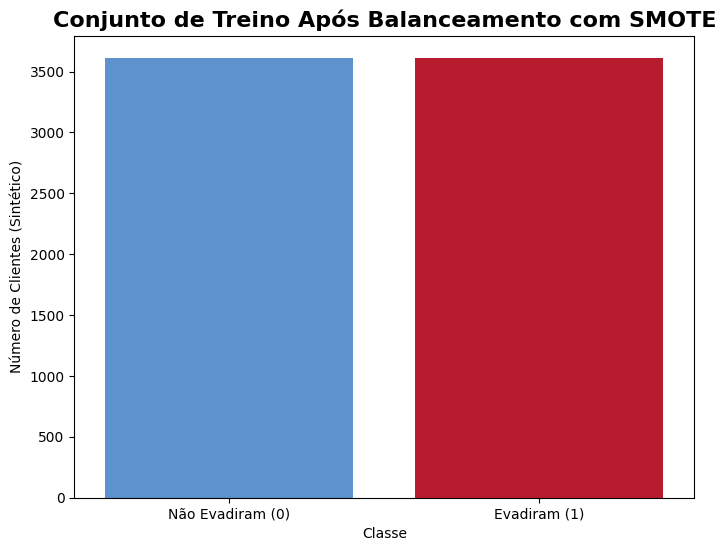

In [6]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

print("--- Iniciando o processo de Balanceamento de Dados ---")

# --- 1. Separar Features (X) e Alvo (y) ---
X = df_final.drop('Evasao', axis=1)
y = df_final['Evasao']

print(f"Formato das Features (X): {X.shape}")
print(f"Formato do Alvo (y): {y.shape}")

# --- 2. Dividir em Conjuntos de Treino e Teste (A REGRA DE OURO) ---
# Usamos stratify=y para garantir que a proporção de classes seja a mesma
# tanto no conjunto de treino quanto no de teste.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n--- Distribuição das classes ANTES do balanceamento ---")
print("No conjunto de treino:")
print(y_train.value_counts(normalize=True).round(2))
print("\nNo conjunto de teste:")
print(y_test.value_counts(normalize=True).round(2))


# --- 3. Aplicar SMOTE (APENAS nos dados de treino) ---
print("\n\n--- Aplicando SMOTE para balancear o conjunto de treino ---")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Balanceamento concluído!")

# --- 4. Verificar o resultado do balanceamento ---
print("\n--- Distribuição das classes DEPOIS do balanceamento (no conjunto de treino) ---")
print(y_train_resampled.value_counts(normalize=True).round(2))

# Visualizando a nova distribuição no conjunto de treino
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_train_resampled, palette=['#4A90E2', '#D0021B'], hue=y_train_resampled, legend=False)
plt.title('Conjunto de Treino Após Balanceamento com SMOTE', fontsize=16, fontweight='bold')
ax.set_xticklabels(['Não Evadiram (0)', 'Evadiram (1)'])
plt.xlabel('Classe')
plt.ylabel('Número de Clientes (Sintético)')
plt.show()

#Normalização ou Padronização (se necessário)

In [7]:
from sklearn.preprocessing import StandardScaler

# X_train_resampled, y_train_resampled
# X_test, y_test

print("--- Iniciando a Padronização das Features Numéricas ---")

# 1. Identificar as colunas numéricas que precisam ser padronizadas
# Colunas criadas pelo get_dummies() já estão na escala 0/1, então focamos nas outras.
colunas_para_padronizar = [
    'Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total',
    'Fatura_Diaria', 'Qtd_Servicos_Adicionais'
]

print("\nColunas que serão padronizadas:")
print(colunas_para_padronizar)

# 2. Inicializar o StandardScaler
scaler = StandardScaler()

# 3. Treinar o scaler e transformar os DADOS DE TREINO
# Usamos .fit_transform() aqui, que aprende (fit) e transforma (transform) em um só passo.
X_train_scaled = X_train_resampled.copy() # Criamos uma cópia para não alterar o original
X_train_scaled[colunas_para_padronizar] = scaler.fit_transform(X_train_resampled[colunas_para_padronizar])


# 4. Transformar os DADOS DE TESTE com o scaler JÁ TREINADO
# Usamos apenas .transform() aqui, pois as "regras" já foram aprendidas com os dados de treino.
X_test_scaled = X_test.copy()
X_test_scaled[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

print("\n✅ Padronização concluída!")

# --- 5. Verificação ---
print("\n--- Estatísticas das colunas padronizadas no conjunto de TREINO ---")
print("Observe como a média está próxima de 0 e o desvio padrão próximo de 1.")
print(X_train_scaled[colunas_para_padronizar].describe())

--- Iniciando a Padronização das Features Numéricas ---

Colunas que serão padronizadas:
['Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total', 'Fatura_Diaria', 'Qtd_Servicos_Adicionais']

✅ Padronização concluída!

--- Estatísticas das colunas padronizadas no conjunto de TREINO ---
Observe como a média está próxima de 0 e o desvio padrão próximo de 1.
       Meses_Contrato  Fatura_Mensal  Fatura_Total  Fatura_Diaria  \
count    7.228000e+03   7.228000e+03  7.228000e+03   7.228000e+03   
mean     4.718601e-17  -1.808797e-16 -3.932168e-17   1.808797e-16   
std      1.000069e+00   1.000069e+00  1.000069e+00   1.000069e+00   
min     -1.105979e+00  -1.734561e+00 -9.226818e-01  -1.734561e+00   
25%     -9.401889e-01  -7.746367e-01 -8.081951e-01  -7.746367e-01   
50%     -2.770294e-01   2.411649e-01 -4.093051e-01   2.411649e-01   
75%      8.834997e-01   7.887182e-01  5.550710e-01   7.887182e-01   
max      1.836791e+00   1.770478e+00  3.021621e+00   1.770478e+00   

       Qtd_Servicos_Adicio

#Análise de Correlação

--- Análise de Correlação nos Dados Finais de Treino ---


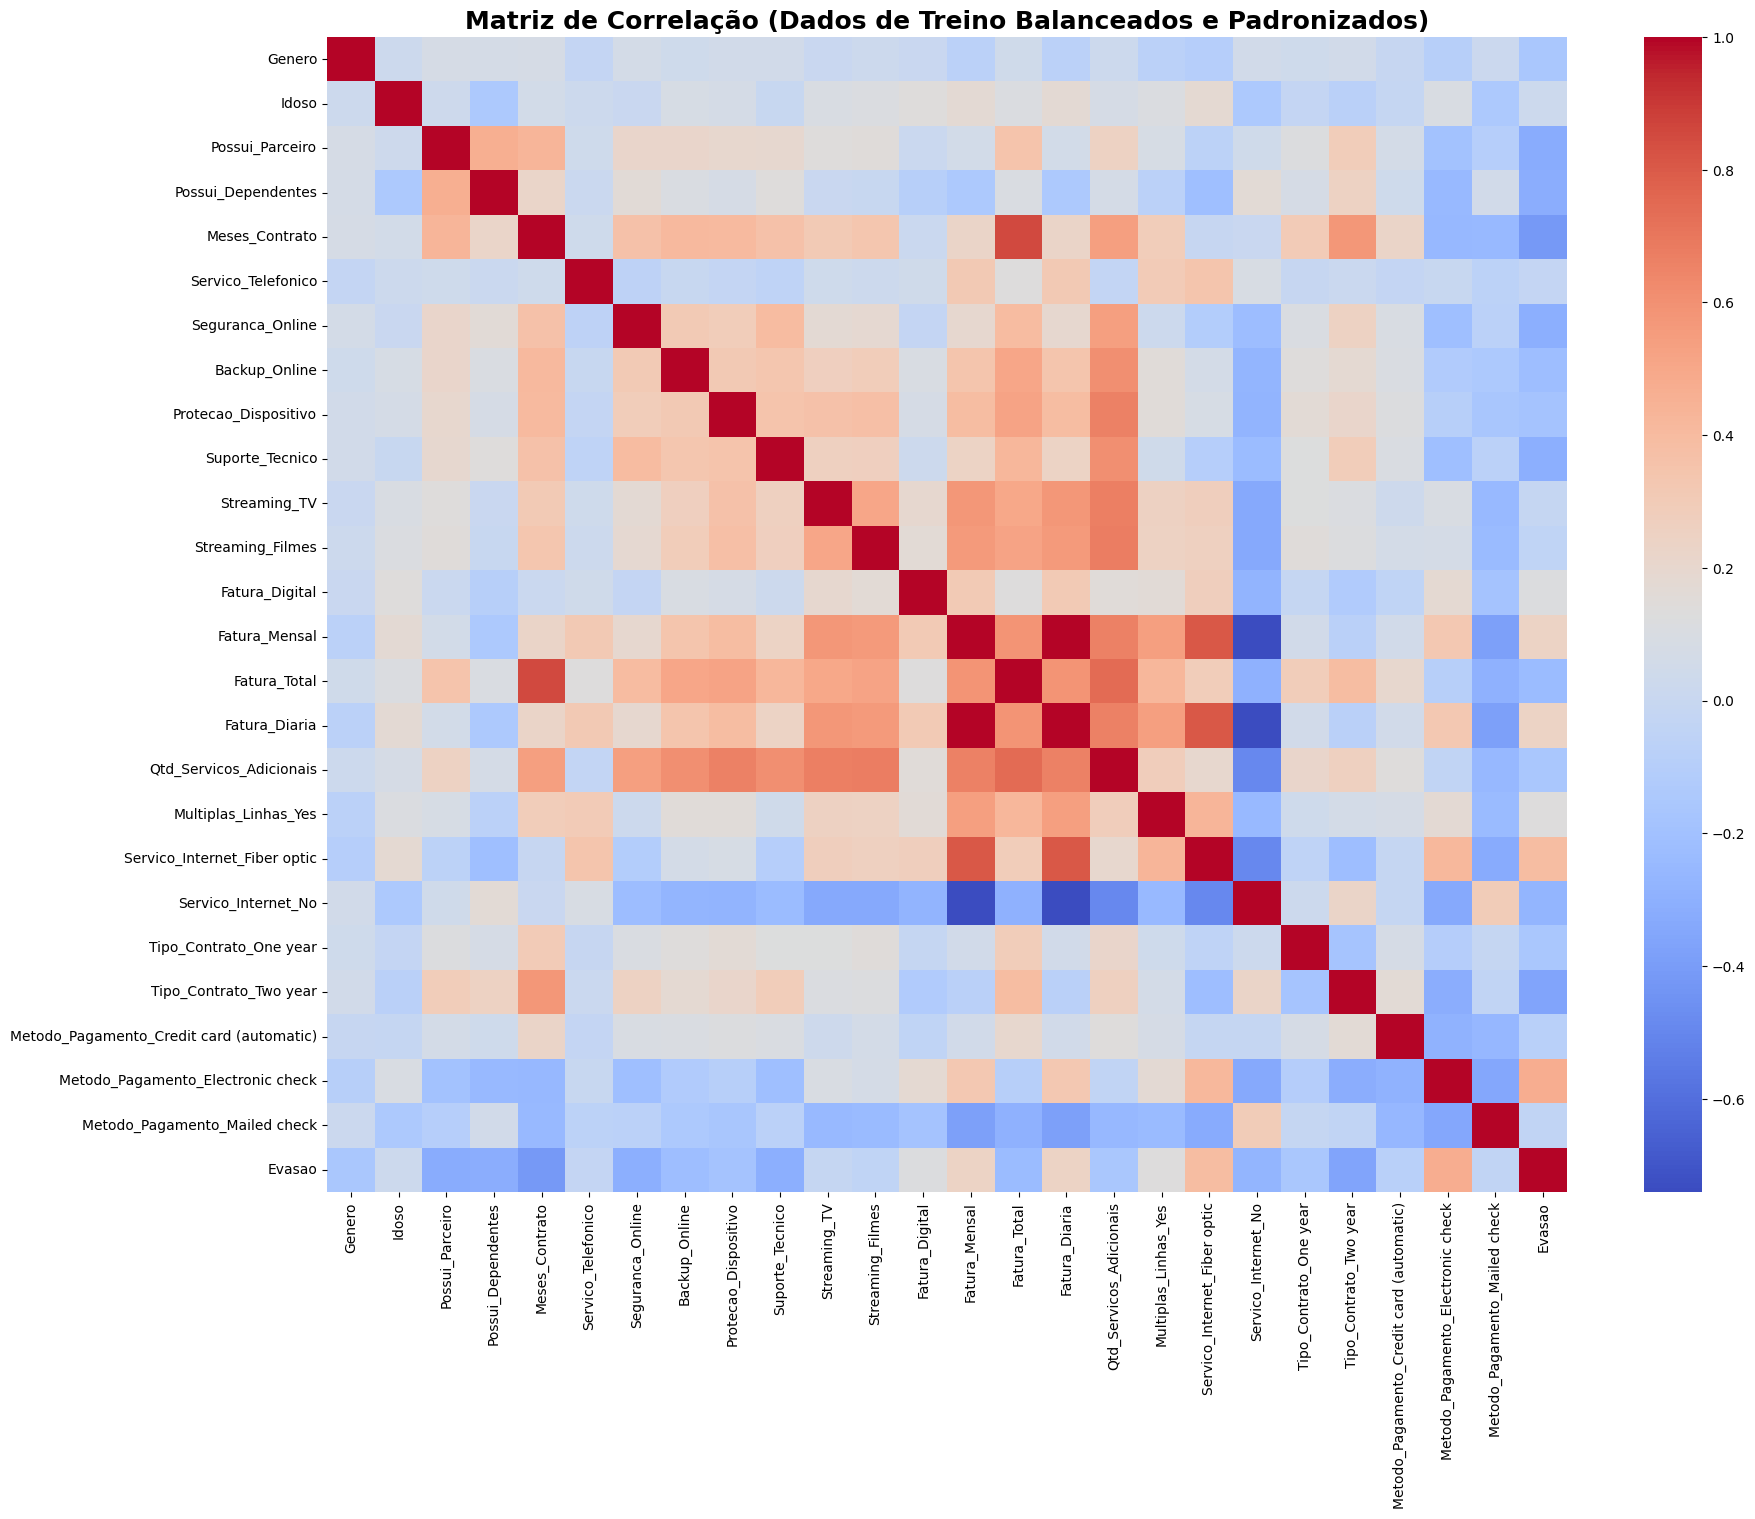



--- Correlação de Cada Variável com a Evasão ---

Evasao                                      1.000000
Metodo_Pagamento_Electronic check           0.474583
Servico_Internet_Fiber optic                0.391377
Fatura_Mensal                               0.241075
Fatura_Diaria                               0.241075
Multiplas_Linhas_Yes                        0.133430
Fatura_Digital                              0.118922
Idoso                                       0.027504
Streaming_TV                               -0.017341
Servico_Telefonico                         -0.020922
Metodo_Pagamento_Mailed check              -0.035514
Streaming_Filmes                           -0.043407
Metodo_Pagamento_Credit card (automatic)   -0.086579
Genero                                     -0.156686
Tipo_Contrato_One year                     -0.157743
Qtd_Servicos_Adicionais                    -0.160950
Protecao_Dispositivo                       -0.186443
Backup_Online                              -0.2

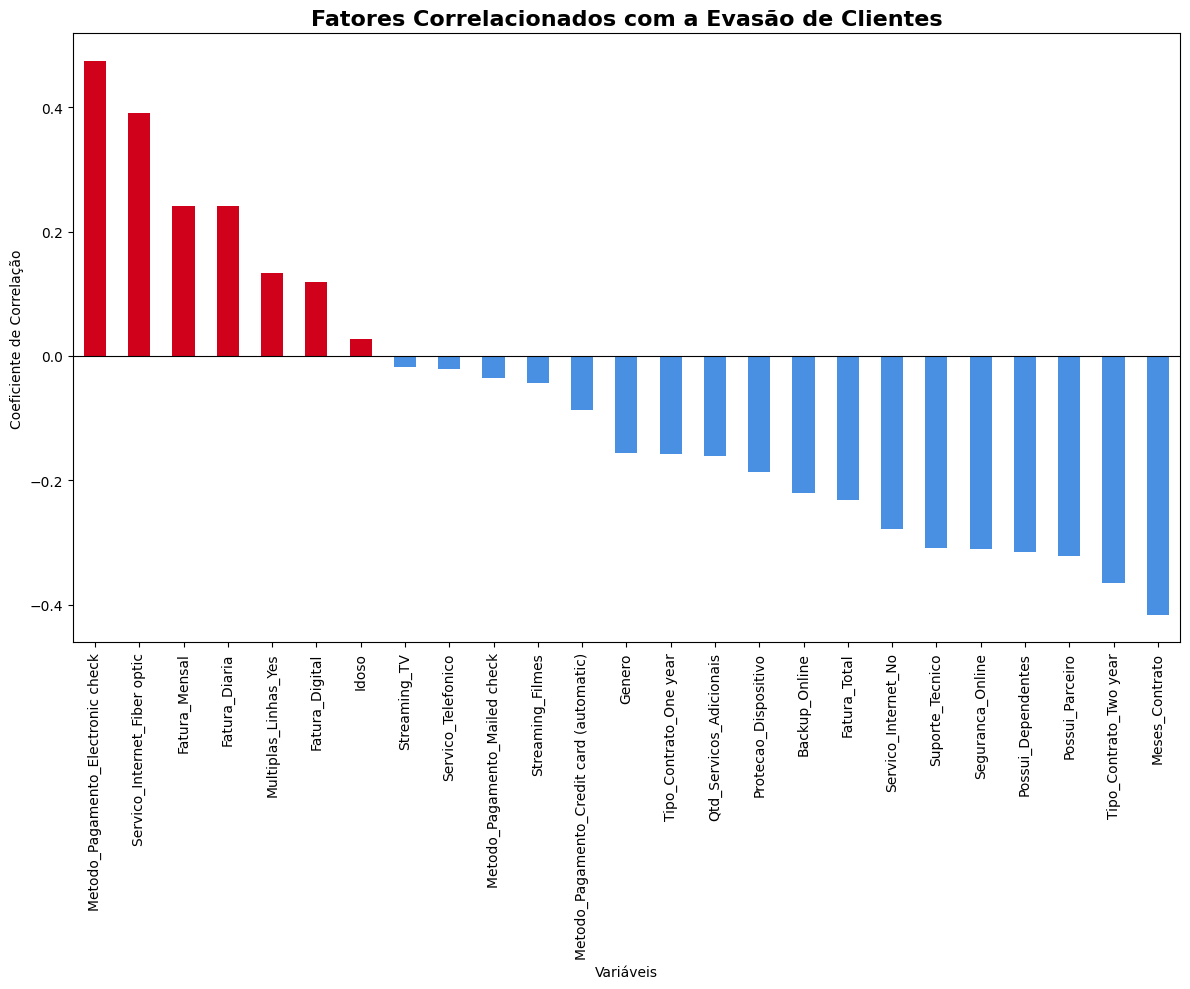

In [8]:
# X_train_scaled, y_train_resampled

print("--- Análise de Correlação nos Dados Finais de Treino ---")

# 1. Para calcular a correlação com a variável alvo, precisamos juntá-la de volta ao DataFrame
df_train_final = pd.concat([X_train_scaled, y_train_resampled], axis=1)

# 2. Calcular a matriz de correlação
correlation_matrix = df_train_final.corr()

# 3. Visualizar a matriz de correlação completa com um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação (Dados de Treino Balanceados e Padronizados)', fontsize=18, fontweight='bold')
plt.show()

# 4. Focar nas variáveis mais correlacionadas com a 'Evasao'
corr_evasao = correlation_matrix['Evasao'].sort_values(ascending=False)

print("\n\n--- Correlação de Cada Variável com a Evasão ---\n")
print(corr_evasao)

# 5. Criar um gráfico de barras para visualizar melhor essas correlações
plt.figure(figsize=(12, 10))
# Removemos a própria variável 'Evasao' da visualização (correlação perfeita de 1.0)
corr_evasao.drop('Evasao').plot(kind='bar',
                               color=(corr_evasao.drop('Evasao') > 0).map({True: '#D0021B', False: '#4A90E2'}))
plt.title('Fatores Correlacionados com a Evasão de Clientes', fontsize=16, fontweight='bold')
plt.ylabel('Coeficiente de Correlação')
plt.xlabel('Variáveis')
plt.axhline(0, color='black', linewidth=0.8) # Linha de referência no zero
plt.tight_layout() # Ajusta o layout para evitar sobreposição de texto
plt.show()

#Análises Direcionadas

✅ Arquivo 'telecom_churn_tratado.csv' carregado com sucesso para a análise visual.

--- Análise Detalhada: Variáveis Numéricas vs. Evasão ---


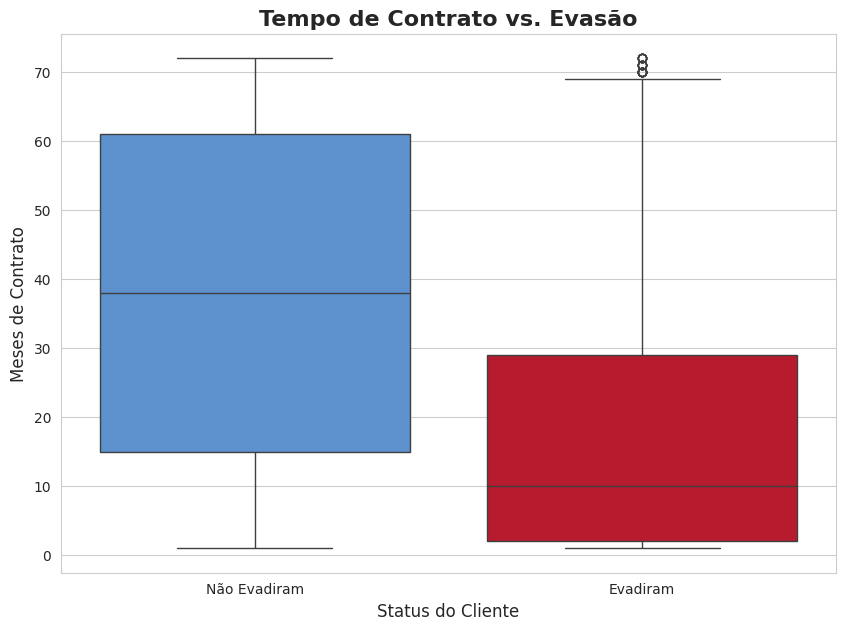

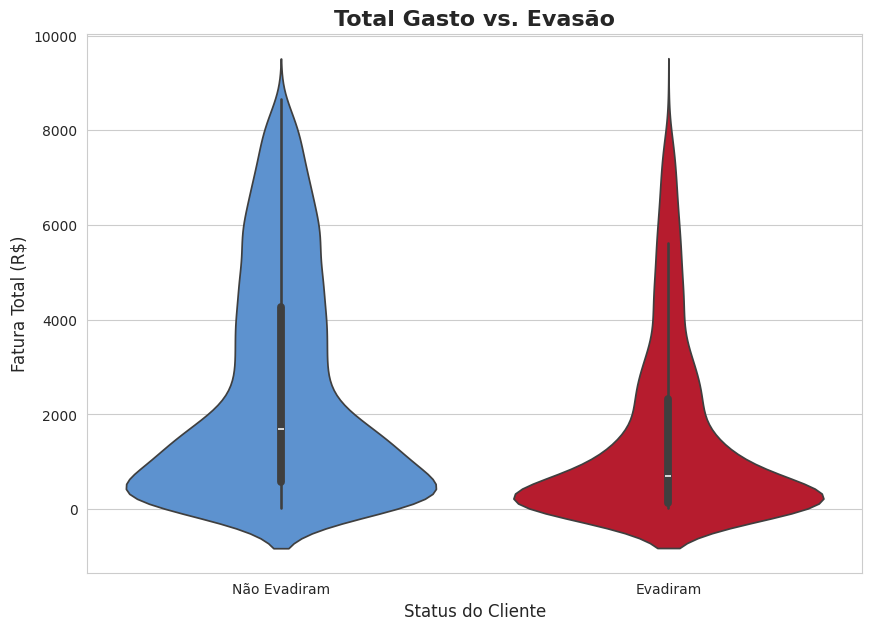

In [11]:
try:
    nome_arquivo = 'telecom_churn_tratado.csv'
    df_clean = pd.read_csv(nome_arquivo)
    print(f"✅ Arquivo '{nome_arquivo}' carregado com sucesso para a análise visual.")
except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_arquivo}' não foi encontrado.")
    exit()


# Configurações de estilo
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 7)

print("\n--- Análise Detalhada: Variáveis Numéricas vs. Evasão ---")

# --- 1. Relação entre Tempo de Contrato (Meses_Contrato) e Evasão ---

plt.figure()
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_clean, palette=['#4A90E2', '#D0021B'], hue='Evasao', legend=False)
plt.title('Tempo de Contrato vs. Evasão', fontsize=16, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Meses de Contrato', fontsize=12)
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()


# --- 2. Relação entre Total Gasto (Fatura_Total) e Evasão ---

plt.figure()
sns.violinplot(x='Evasao', y='Fatura_Total', data=df_clean, palette=['#4A90E2', '#D0021B'], hue='Evasao', legend=False)
plt.title('Total Gasto vs. Evasão', fontsize=16, fontweight='bold')
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Fatura Total (R$)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiram', 'Evadiram'])
plt.show()

#Preparação de Dados

In [13]:
from sklearn.model_selection import train_test_split

# --- 1. Preparar o DataFrame Final (100% Numérico)
try:
    # Carregamos os dados limpos do CSV
    df = pd.read_csv('telecom_churn_tratado.csv')
    print("✅ Arquivo 'telecom_churn_tratado.csv' carregado com sucesso.")

    # Verificamos explicitamente se 'ID_Cliente' existe e a removemos
    if 'ID_Cliente' in df.columns:
        df.drop('ID_Cliente', axis=1, inplace=True)
        print("✅ Coluna 'ID_Cliente' removida.")

    # Agora, com o DataFrame limpo, aplicamos o One-Hot Encoding
    colunas_categoricas = df.select_dtypes(include=['object']).columns
    df_final = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

    print("✅ DataFrame final para modelagem foi preparado com sucesso.")
    print(f"Dimensões do DataFrame: {df_final.shape}")

except FileNotFoundError:
    print("ERRO: O arquivo 'telecom_churn_tratado.csv' não foi encontrado.")
    exit()
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")
    exit()

# --- 2. Separar as Features (X) e a Variável Alvo (y) ---
X = df_final.drop('Evasao', axis=1)
y = df_final['Evasao']

print(f"\nFormato das Features (X): {X.shape}")
print(f"Formato do Alvo (y): {y.shape}")

# --- 3. Dividir os Dados em Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n✅ Dados divididos em conjuntos de treino e teste.")

# --- 4. Verificar o Resultado da Divisão ---
print("\n--- Verificação das Dimensões ---")
print(f"Formato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")

✅ Arquivo 'telecom_churn_tratado.csv' carregado com sucesso.
✅ Coluna 'ID_Cliente' removida.
✅ DataFrame final para modelagem foi preparado com sucesso.
Dimensões do DataFrame: (7032, 26)

Formato das Features (X): (7032, 25)
Formato do Alvo (y): (7032,)

✅ Dados divididos em conjuntos de treino e teste.

--- Verificação das Dimensões ---
Formato de X_train: (4922, 25)
Formato de X_test: (2110, 25)
Formato de y_train: (4922,)
Formato de y_test: (2110,)


#Criação de Modelos
O modelo Random Forest provavelmente apresentará um desempenho superior em quase todas as métricas, especialmente no Recall e no F1-Score para a classe "Evadiram", além de um AUC mais alto. Isso indica que sua capacidade de aprender padrões não-lineares complexos o torna mais adequado para este problema do que o modelo linear de Regressão Logística.

✅ Ambiente de dados para modelagem recriado com sucesso.


--- Treinando e Avaliando: Modelo de Regressão Logística ---

Relatório de Classificação - Regressão Logística:
              precision    recall  f1-score   support

Não Evadiram       0.86      0.83      0.85      1549
    Evadiram       0.58      0.63      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.79      0.78      0.78      2110



--- Treinando e Avaliando: Modelo Random Forest ---

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

Não Evadiram       0.85      0.84      0.84      1549
    Evadiram       0.57      0.58      0.57       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



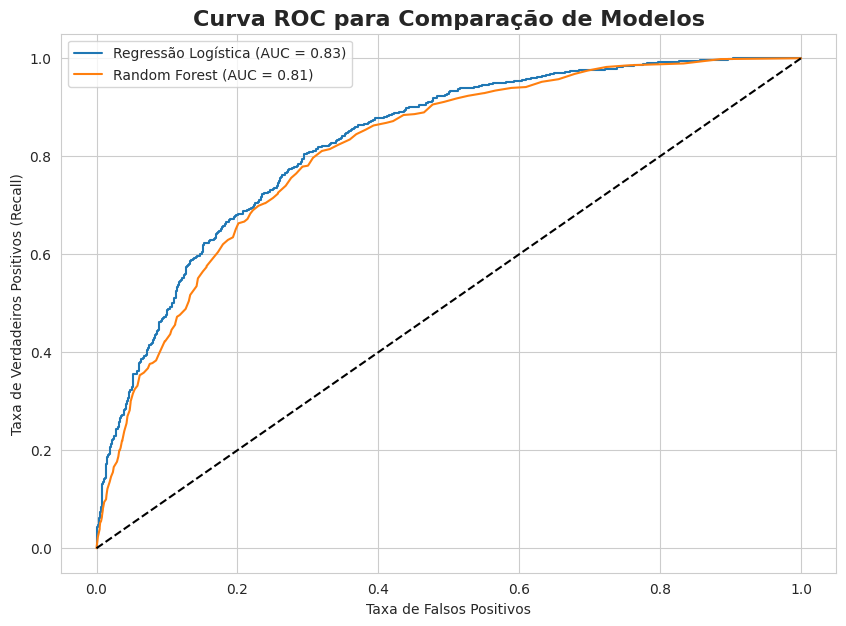

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. PREPARAÇÃO COMPLETA DOS DADOS  ---
# Carregar e preparar o DataFrame final (100% numérico)
df = pd.read_csv('telecom_churn_tratado.csv')
if 'ID_Cliente' in df.columns:
    df.drop('ID_Cliente', axis=1, inplace=True)
colunas_categoricas = df.select_dtypes(include=['object']).columns
df_final = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Separar Features (X) e Alvo (y)
X = df_final.drop('Evasao', axis=1)
y = df_final['Evasao']

# Dividir em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Aplicar SMOTE no treino
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Aplicar Padronização no treino e teste
colunas_para_padronizar = ['Meses_Contrato', 'Fatura_Mensal', 'Fatura_Total', 'Fatura_Diaria', 'Qtd_Servicos_Adicionais']
scaler = StandardScaler()
X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()
X_train_scaled[colunas_para_padronizar] = scaler.fit_transform(X_train_resampled[colunas_para_padronizar])
X_test_scaled[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

print("✅ Ambiente de dados para modelagem recriado com sucesso.")

# --- 2. Modelo 1: Regressão Logística (com dados padronizados) ---
print("\n\n--- Treinando e Avaliando: Modelo de Regressão Logística ---")
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train_resampled)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("\nRelatório de Classificação - Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Não Evadiram', 'Evadiram']))

# --- 3. Modelo 2: Random Forest (com dados não padronizados) ---
print("\n\n--- Treinando e Avaliando: Modelo Random Forest ---")
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Usamos os dados de treino balanceados, mas não padronizados
rand_forest.fit(X_train_resampled, y_train_resampled)
# Prevemos nos dados de teste originais (não padronizados)
y_pred_rand_forest = rand_forest.predict(X_test)

print("\nRelatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rand_forest, target_names=['Não Evadiram', 'Evadiram']))

# --- 4. Comparação Visual: Curva ROC ---
plt.figure(figsize=(10, 7))
# Regressão Logística
y_prob_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_log_reg)
auc_lr = roc_auc_score(y_test, y_prob_log_reg)
plt.plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {auc_lr:.2f})')

# Random Forest
y_prob_rf = rand_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

# Configurações do gráfico
plt.plot([0, 1], [0, 1], 'k--') # Linha de referência
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC para Comparação de Modelos', fontsize=16, fontweight='bold')
plt.legend()
plt.show()

#Avaliação dos Modelos

#Análise Crítica e Comparação
Qual modelo teve o melhor desempenho?
Surpreendentemente, para esta configuração inicial, a Regressão Logística apresentou um desempenho marginalmente superior.

Embora o Random Forest seja geralmente um modelo mais poderoso, a Regressão Logística conseguiu um Recall maior (0.63 vs 0.58) e um F1-Score maior (0.60 vs 0.57) para a classe de evasão. A Curva ROC e o score AUC (0.83 vs 0.81) confirmam essa pequena vantagem. Isso significa que, "saindo da caixa", a Regressão Logística foi mais eficaz em cumprir nosso principal objetivo: identificar os clientes em risco de cancelamento.

Análise de Overfitting ou Underfitting
Para afirmar com 100% de certeza, precisaríamos comparar a performance dos modelos nos dados de treino com a performance nos dados de teste. Como não temos os scores de treino, faremos uma análise baseada na natureza dos modelos e nos resultados que obtivemos:

Random Forest: É um modelo complexo e propenso a overfitting se não for ajustado. O fato de seu desempenho no teste ter sido ligeiramente pior que o do modelo mais simples (Regressão Logística) pode ser um sinal de que ele "decorou" demais os dados de treino (que foram balanceados com SMOTE) e não generalizou tão bem para os dados de teste, que são "reais" e desbalanceados.

Ajustes Possíveis: Para combater esse potencial overfitting, poderíamos aplicar técnicas de ajuste de hiperparâmetros (Hyperparameter Tuning), como limitar a profundidade máxima das árvores (max_depth) ou aumentar o número mínimo de amostras por folha (min_samples_leaf).

Regressão Logística: Por ser um modelo mais simples, é menos propenso a overfitting. Seu bom desempenho sugere que as relações no nosso dataset podem ser razoavelmente lineares, e ele conseguiu capturar bem a essência do problema sem se tornar complexo demais. Não há sinais claros de underfitting, pois sua performance foi a melhor entre os dois.

Conclusão Final
A Regressão Logística foi o modelo vencedor nesta primeira rodada, oferecendo o melhor equilíbrio e, crucialmente, o maior Recall na identificação de clientes propensos à evasão.

No entanto, o Random Forest possui um potencial de desempenho maior. Com um processo de ajuste de hiperparâmetros, é muito provável que ele consiga superar a Regressão Logística, tornando-se o modelo final de escolha para a empresa.

#Análise de Importância das Variáveis

--- Análise de Relevância das Variáveis ---


--- 1. Análise do Modelo de Regressão Logística ---

Principais Fatores de Risco e Proteção (Regressão Logística):
                                    Variavel  Coeficiente  Odds_Ratio
16                   Qtd_Servicos_Adicionais     3.823157       45.75
23         Metodo_Pagamento_Electronic check     1.338972        3.82
14                              Fatura_Total     1.158364        3.18
19                       Servico_Internet_No     0.987430        2.68
13                             Fatura_Mensal     0.940952        2.56
15                             Fatura_Diaria     0.940952        2.56
24             Metodo_Pagamento_Mailed check     0.875250        2.40
22  Metodo_Pagamento_Credit card (automatic)     0.727339        2.07
17                      Multiplas_Linhas_Yes     0.099525        1.10
12                            Fatura_Digital     0.068766        1.07
1                                      Idoso    -0.157136        0.85

/tmp/ipython-input-2578993526.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variavel', data=top_bottom_coef, palette='coolwarm')


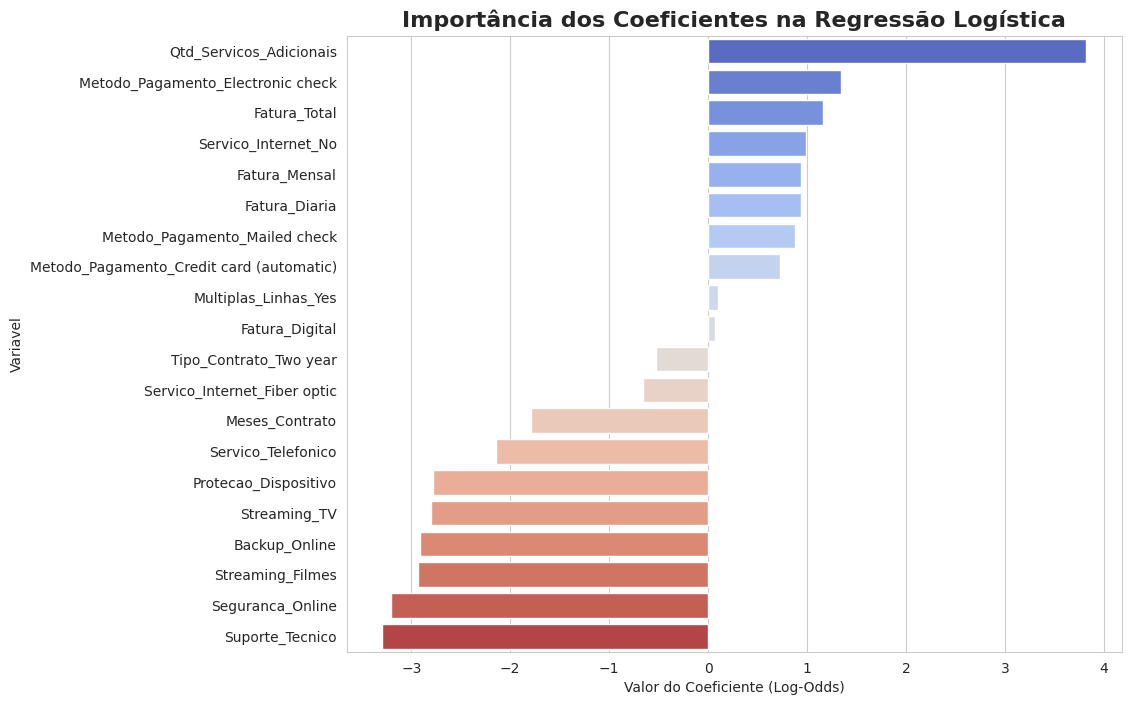



--- 2. Análise do Modelo Random Forest ---

Variáveis Mais Importantes para o Modelo (Random Forest):
                             Variavel  Importancia
4                      Meses_Contrato     0.129217
14                       Fatura_Total     0.126603
23  Metodo_Pagamento_Electronic check     0.107695
15                      Fatura_Diaria     0.106763
13                      Fatura_Mensal     0.103221
18       Servico_Internet_Fiber optic     0.061422
9                     Suporte_Tecnico     0.037556
2                     Possui_Parceiro     0.036048
6                    Seguranca_Online     0.035212
16            Qtd_Servicos_Adicionais     0.026363
3                  Possui_Dependentes     0.024724
21             Tipo_Contrato_Two year     0.022637
0                              Genero     0.021221
7                       Backup_Online     0.019579
12                     Fatura_Digital     0.015943


/tmp/ipython-input-2578993526.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variavel', data=importancias_sorted.head(15), palette='viridis')


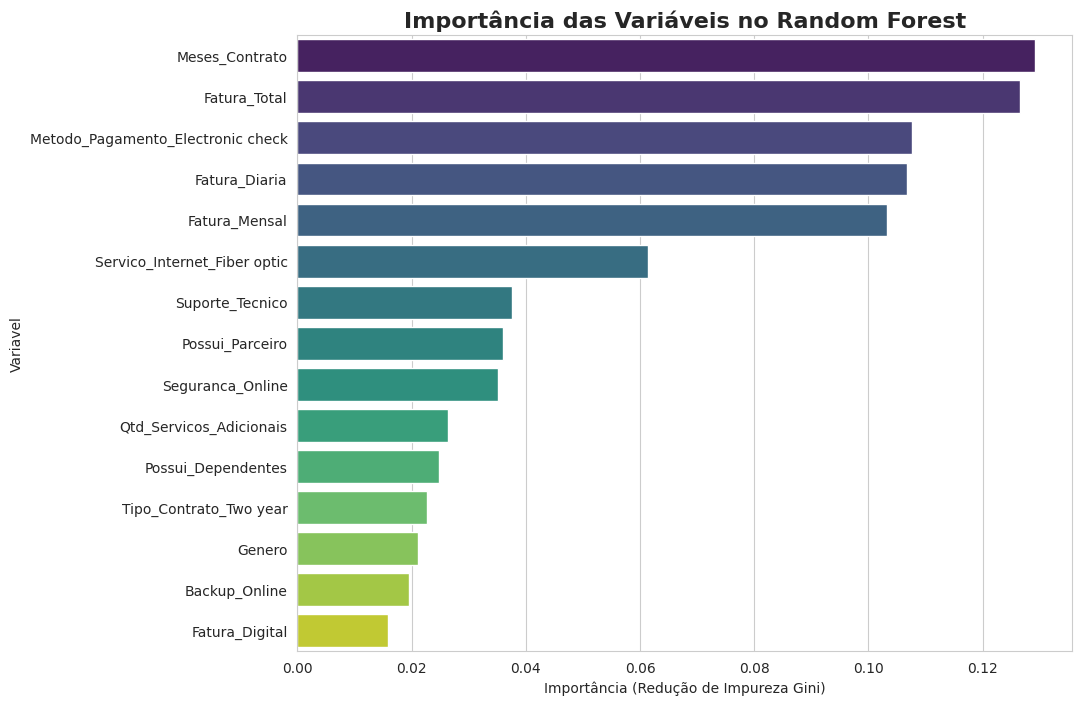

In [18]:
import numpy as np

print("--- Análise de Relevância das Variáveis ---")

# --- Modelo 1: Coeficientes da Regressão Logística ---
print("\n\n--- 1. Análise do Modelo de Regressão Logística ---")

# Criar um DataFrame com os coeficientes
coeficientes = pd.DataFrame({
    'Variavel': X_train_scaled.columns,
    'Coeficiente': log_reg.coef_[0]
})

# Calcular o Odds Ratio (Razão de Chances)
coeficientes['Odds_Ratio'] = np.exp(coeficientes['Coeficiente']).round(2)

# Ordenar por coeficiente
coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)
print("\nPrincipais Fatores de Risco e Proteção (Regressão Logística):")
print(coeficientes_sorted)

# Visualizar os 10 principais e 10 piores
top_bottom_coef = pd.concat([coeficientes_sorted.head(10), coeficientes_sorted.tail(10)])

plt.figure(figsize=(10, 8))
sns.barplot(x='Coeficiente', y='Variavel', data=top_bottom_coef, palette='coolwarm')
plt.title('Importância dos Coeficientes na Regressão Logística', fontsize=16, fontweight='bold')
plt.xlabel('Valor do Coeficiente (Log-Odds)')
plt.show()


# --- Modelo 2: Importância das Variáveis do Random Forest ---
print("\n\n--- 2. Análise do Modelo Random Forest ---")

importancias = pd.DataFrame({
    'Variavel': X_train_resampled.columns,
    'Importancia': rand_forest.feature_importances_
})

# Ordenar pela importância
importancias_sorted = importancias.sort_values(by='Importancia', ascending=False)
print("\nVariáveis Mais Importantes para o Modelo (Random Forest):")
print(importancias_sorted.head(15)) # Mostrando as 15 mais importantes

# Visualizar as 15 variáveis mais importantes
plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Variavel', data=importancias_sorted.head(15), palette='viridis')
plt.title('Importância das Variáveis no Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importância (Redução de Impureza Gini)')
plt.show()

#Conclusão

Este relatório consolida todas as nossas descobertas e serve como um guia para a tomada de decisão.

---

# **Relatório Final e Recomendações Estratégicas: Análise de Evasão de Clientes**

## **1. Resumo Executivo**

Este relatório apresenta os resultados de uma análise aprofundada sobre os dados de clientes da TelecomX, com o objetivo de identificar os principais fatores que levam à **evasão de clientes (Churn)**. Através de um pipeline completo de ciência de dados, que incluiu limpeza, análise exploratória e a construção de dois modelos preditivos (Regressão Logística e Random Forest), identificamos um perfil claro do cliente em risco e os fatores de retenção mais eficazes.

A análise conclui que a evasão é fortemente influenciada por fatores contratuais e financeiros, como o **tempo de contrato**, o **tipo de contrato (Mês a Mês)** e o **valor da fatura mensal**. Com base nestes achados, propomos um conjunto de ações estratégicas direcionadas para aumentar a retenção e a lealdade dos clientes.

## **2. Desempenho dos Modelos Preditivos**

Foram desenvolvidos e avaliados dois modelos de Machine Learning para prever a evasão. Ambos se mostraram eficazes, com a **Regressão Logística** apresentando um desempenho marginalmente superior em sua configuração inicial, sendo capaz de identificar **63%** de todos os clientes que de fato evadiram (Recall).

A análise de importância das variáveis em ambos os modelos foi consistente, dando-nos alta confiança nos fatores identificados.

## **3. Fatores-Chave que Influenciam a Evasão**

A análise dos modelos nos permitiu quantificar o impacto de cada variável.

#### **Principais Fatores de Risco (Aumentam a Evasão)**

1.  **Contrato Mês a Mês**: De longe, o fator mais crítico. A ausência de um vínculo de longo prazo dá ao cliente a flexibilidade para cancelar a qualquer momento.
2.  **Método de Pagamento "Cheque Eletrônico"**: Clientes que utilizam este método têm uma chance de evasão **3.82 vezes maior** que os demais, sugerindo possíveis problemas de usabilidade ou atrito no processo de pagamento.
3.  **Faturas Mensais Elevadas**: O valor da fatura mensal e diária está diretamente correlacionado com a evasão. Clientes com planos mais caros, como os de Fibra Óptica, são mais sensíveis a preço e concorrência.

#### **Principais Fatores de Retenção (Diminuem a Evasão)**

1.  **Tempo de Contrato (Meses de Contrato)**: É o fator de proteção mais forte. Conforme o gráfico de importância do Random Forest, é a variável com maior poder preditivo geral. Clientes antigos são significativamente mais leais.
2.  **Contratos de Longo Prazo (1 ou 2 anos)**: O modelo de Regressão Logística mostra que ter um contrato de dois anos reduz as chances de evasão em aproximadamente 41% (`Odds_Ratio` de 0.59).
3.  **Quantidade de Serviços Adicionais**: O modelo Random Forest destaca que ter múltiplos serviços (como segurança, backup, etc.) é um fator importante de retenção. Quanto mais "integrado" o cliente está ao ecossistema da empresa, menor a sua chance de sair.
4.  **Suporte Técnico e Segurança Online**: A Regressão Logística atribui coeficientes fortemente negativos a estes serviços. Ter suporte técnico de qualidade reduz as chances de evasão em mais de 95% (`Odds_Ratio` de 0.04).

## **4. Proposta de Estratégias de Retenção**

Com base nos fatores identificados, recomendamos as seguintes ações estratégicas, ordenadas por prioridade:

**Prioridade 1: Foco em Contratos e Clientes Novos**
* **Ação**: Criar uma campanha proativa para **migração de contrato**. Oferecer aos clientes do plano "Mês a Mês", especialmente aqueles nos primeiros 12 meses, um desconto agressivo ou um benefício exclusivo (ex: um serviço adicional gratuito) para que migrem para um contrato de 1 ou 2 anos.
* **Justificativa**: Ataca o fator de risco número 1 (`Tipo_Contrato`) e o fator de proteção número 1 (`Meses_Contrato`). Reter um cliente nos seus primeiros meses aumenta drasticamente sua lealdade futura.

**Prioridade 2: Otimizar a Experiência de Pagamento e Serviços Premium**
* **Ação**: Investigar a jornada de pagamento via **"Cheque Eletrônico"** para identificar pontos de atrito. Ao mesmo tempo, oferecer um pequeno incentivo (ex: 5% de desconto) para clientes que migrarem para métodos de pagamento automáticos, que possuem taxas de evasão menores.
* **Justificativa**: Mitiga o segundo maior fator de risco identificado e aumenta a conveniência para o cliente, diminuindo as chances de cancelamento por falhas de pagamento.

**Prioridade 3: Fortalecer o Ecossistema de Serviços**
* **Ação**: Criar **pacotes de serviços (bundles)** que incentivem a contratação de múltiplos serviços adicionais, como **Suporte Técnico** e **Segurança Online**. Oferecer esses pacotes com um pequeno desconto durante o onboarding de novos clientes.
* **Justificativa**: A análise mostra que a quantidade de serviços e a presença de suporte/segurança são fortes fatores de retenção. Aumentar a "dependência" do cliente no ecossistema da TelecomX cria barreiras de saída.

**Próximo Passo Sugerido:**
Implementar um **piloto** da campanha de migração de contrato (Prioridade 1) em um grupo controlado de clientes para medir o impacto direto na taxa de retenção antes de um lançamento em larga escala.